In [16]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import pickle
import os; print(os.environ.get('QT_API'))

None


In [31]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('C:\data\\calibration_wide\GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [41]:
#print(imgpoints)
#print(objpoints)

### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

In [43]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('C:\\data\\calibration_wide\\test_image.jpg')

img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('C:\\data\\calibration_wide\\test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "C:\\data\\calibration_wide\\wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

NameError: name 'objpoints' is not defined

In [3]:
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients

# Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M

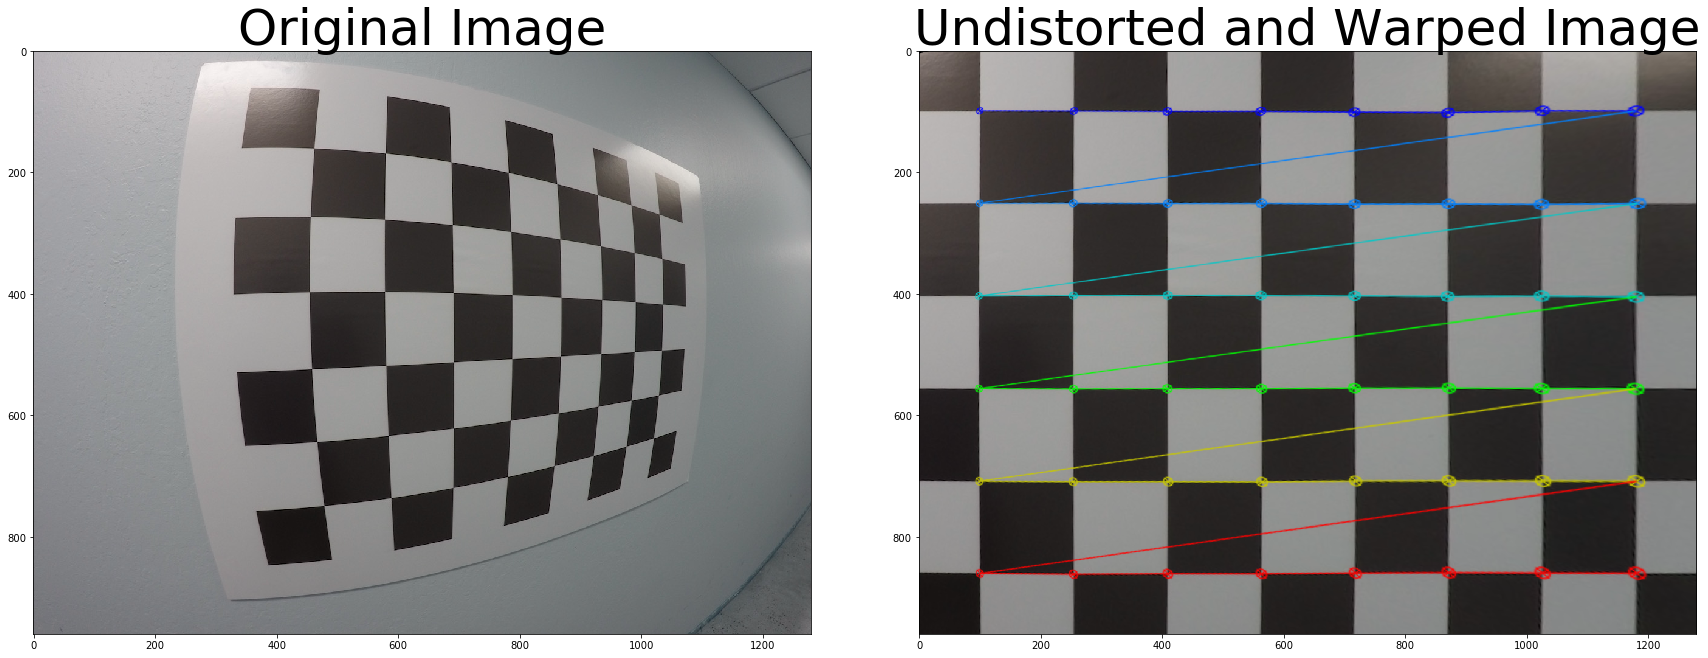

In [5]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "C:\\data\\calibration_wide\\wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('C:\\data\\distortion\\original.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

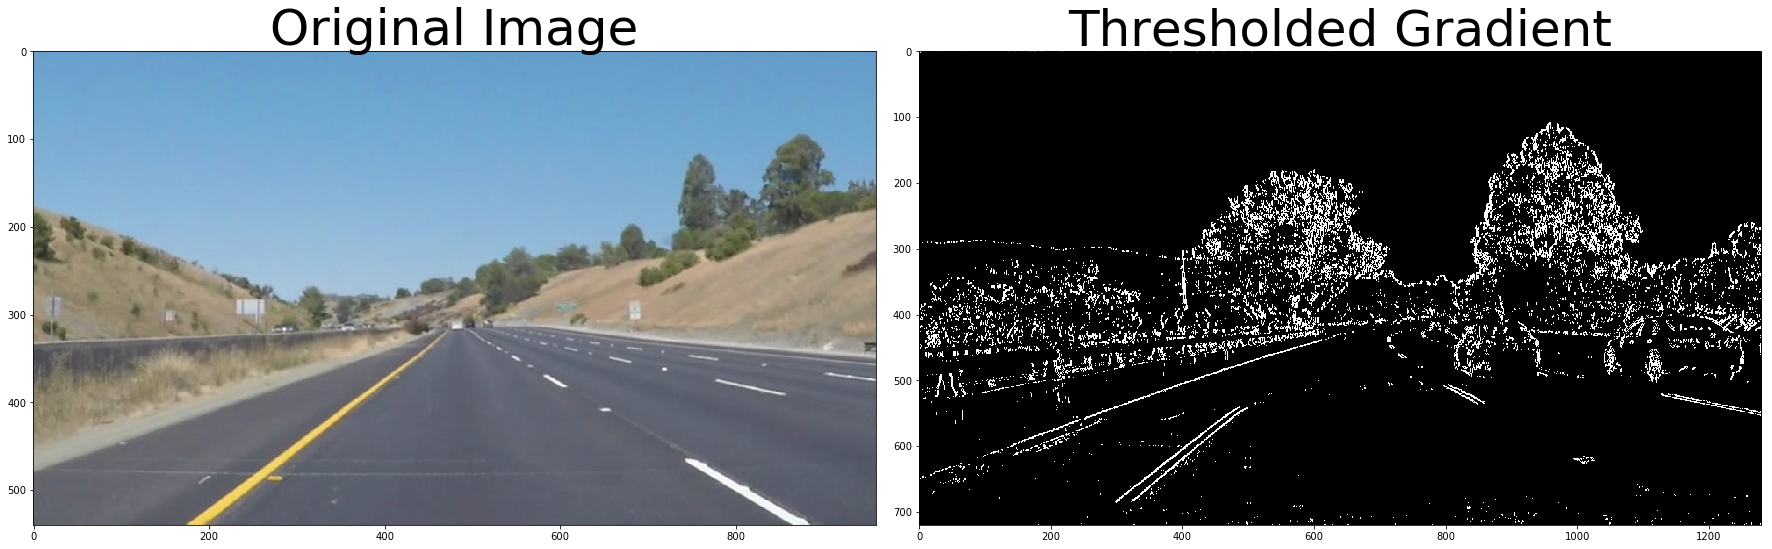

In [210]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image and grayscale it
image = mpimg.imread('C:\\Users\\swillin\\Documents\\Private\\courses\\Driver\\projects\\lane_line_detection\\test_images\\whiteCarLaneSwitch.jpg')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    if orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    return sxbinary
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

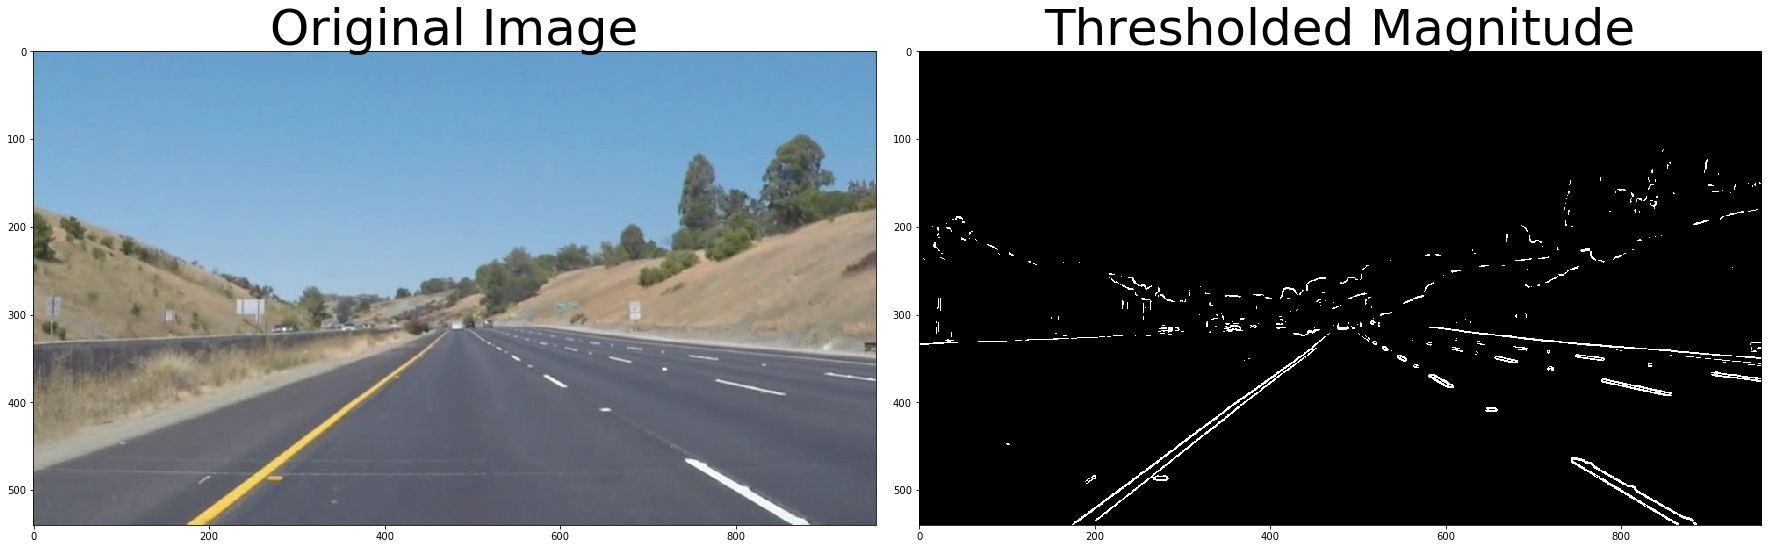

In [82]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('C:\\Users\\swillin\\Documents\\Private\\courses\\Driver\\projects\\lane_line_detection\\test_images\\whiteCarLaneSwitch.jpg')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # 5) Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(80, 240))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

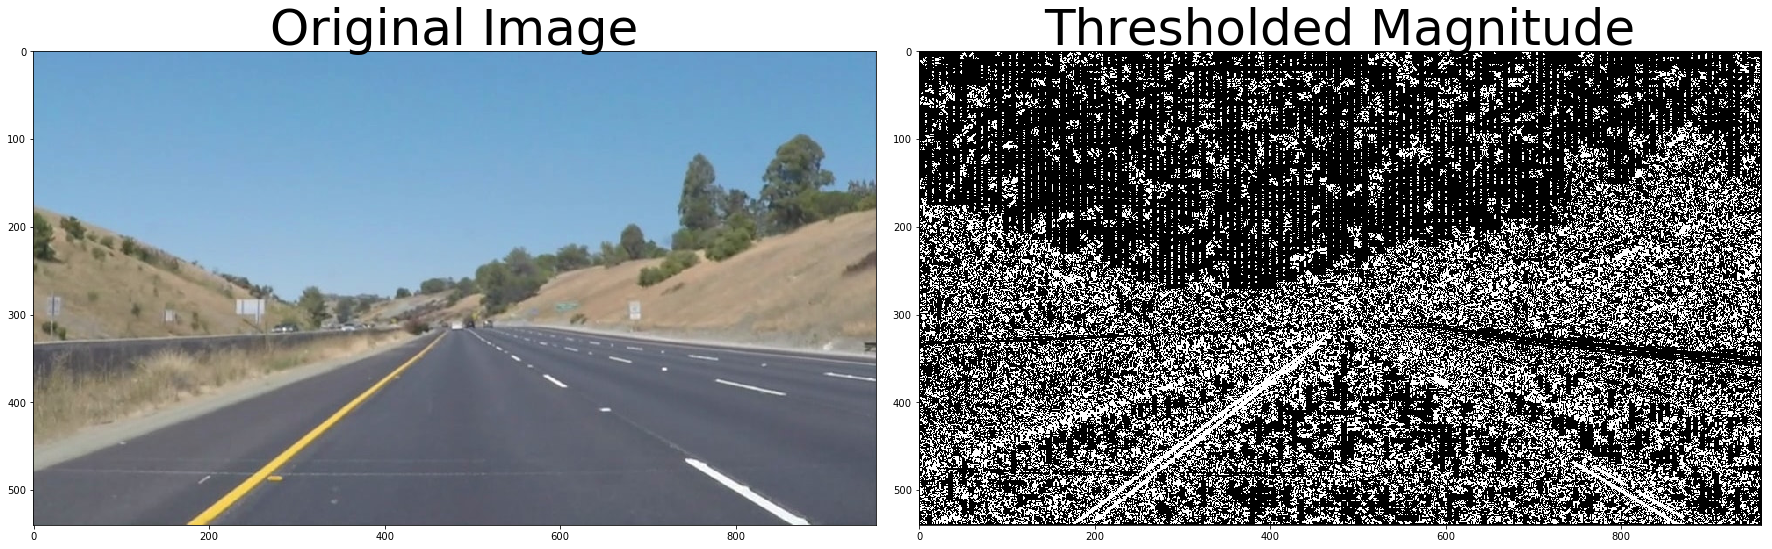

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('C:\\Users\\swillin\\Documents\\Private\\courses\\Driver\\projects\\lane_line_detection\\test_images\\whiteCarLaneSwitch.jpg')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
# Calculate gradient magnitude
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the direction of the gradient using the absolute value of the x and y gradients
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    # 4) Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(absgraddir)
    binary_output[(absgraddir >= mag_thresh[0]) & (absgraddir <= mag_thresh[1])] = 1

    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

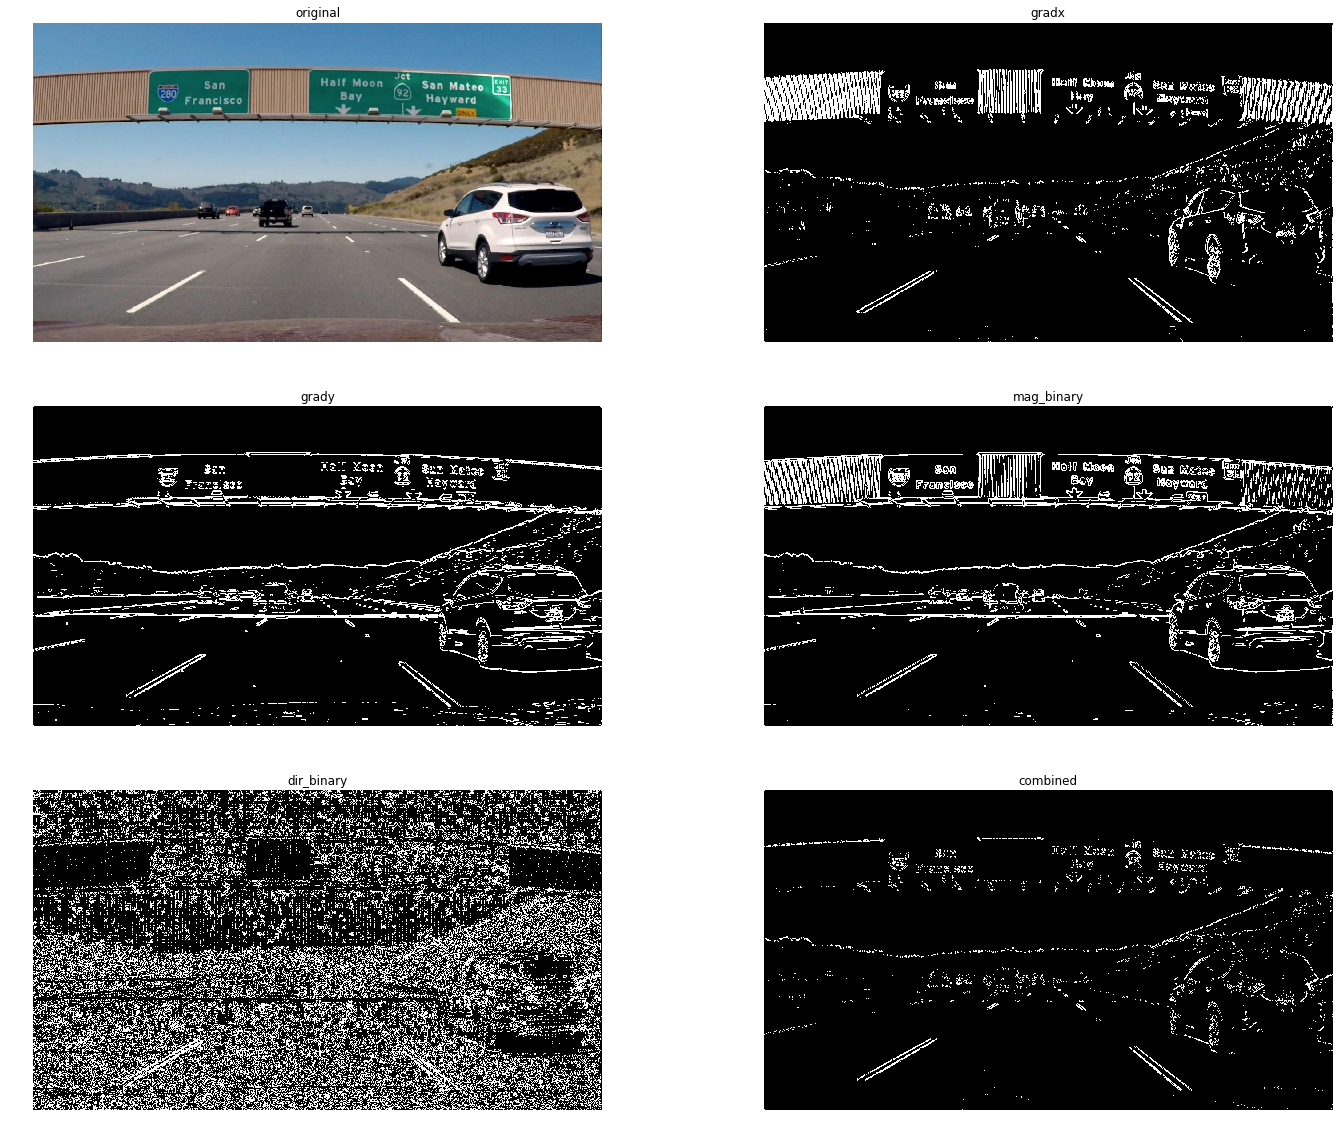

In [92]:
%matplotlib inline

images=[]
images_title=[]

# Read in an image
image = mpimg.imread('C:\\data\\distortion\\vehicles.png')
images.append(image)
images_title.append('original')

ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(20, 100))
images.append(gradx)
images_title.append('gradx')

grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(20, 100))
images.append(grady)
images_title.append('grady')

mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
images.append(mag_binary)
images_title.append('mag_binary')

dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
images.append(dir_binary)
images_title.append('dir_binary')

# Selection for pixels where both the x and y gradients meet the threshold criteria, 
# or the gradient magnitude and direction are both within their threshold values.
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
images.append(combined)
images_title.append('combined')

plt.figure(figsize=(24, 20))
for i in range(len(images)):
   # Displaying the images 
    plt.subplot(3, 2, i+1)
    plt.imshow(images[i], cmap='gray') 
    plt.title(images_title[i])
    plt.axis('off')

In [99]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images=[]
images_title=[]

image = mpimg.imread('C:\\data\\distortion\\test4.jpg')

thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
images.append(gray)
images_title.append('gray')

binary_gray = np.zeros_like(gray)
binary_gray[(gray > thresh[0]) & (gray <= thresh[1])] = 1
images.append(binary_gray)
images_title.append('gray binary')

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

images.append(R)
images_title.append('R channel')

thresh = (200, 255)
binary_r = np.zeros_like(R)
binary_r[(R > thresh[0]) & (R <= thresh[1])] = 1
images.append(binary_r)
images_title.append('R channel Binary')

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

images.append(S)
images_title.append('S channel')

thresh = (90, 255)
binary_s = np.zeros_like(S)
binary_s[(S > thresh[0]) & (S <= thresh[1])] = 1
images.append(binary_s)
images_title.append('S channel Binary')

images.append(H)
images_title.append('H channel')

thresh = (15, 100)
binary_h = np.zeros_like(H)
binary_h[(H > thresh[0]) & (H <= thresh[1])] = 1
images.append(binary_h)
images_title.append('H channel Binary')



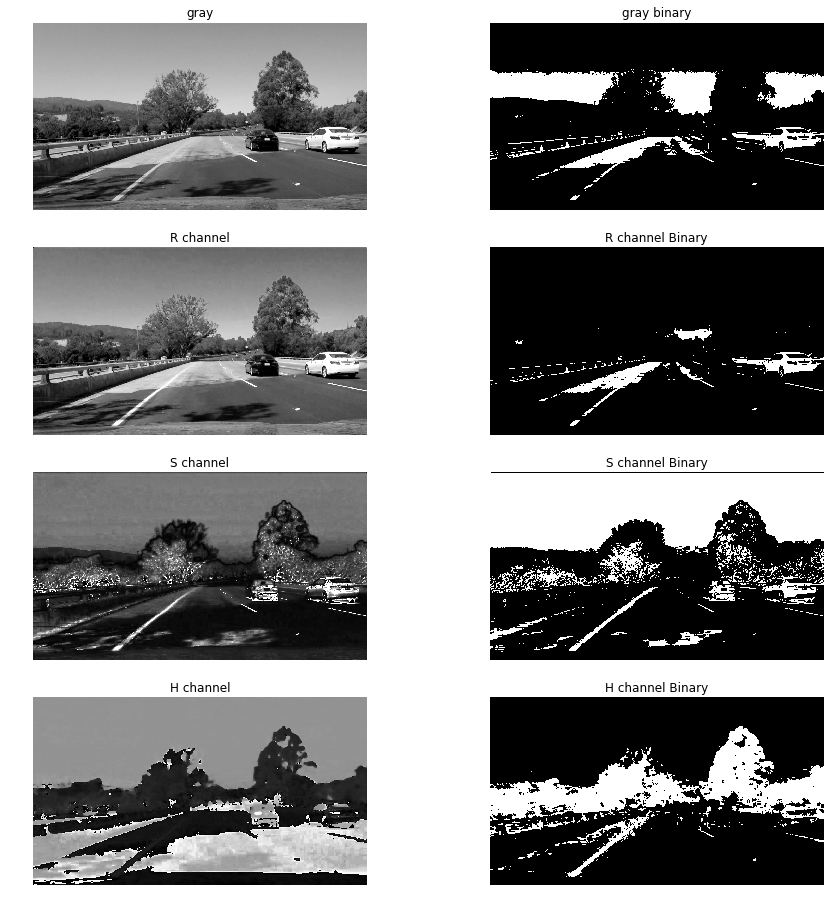

In [100]:
plt.figure(figsize=(15, 20))
for i in range(len(images)):
   # Displaying the images 
    plt.subplot(5, 2, i+1)
    plt.imshow(images[i], cmap='gray') 
    plt.title(images_title[i])
    plt.axis('off')

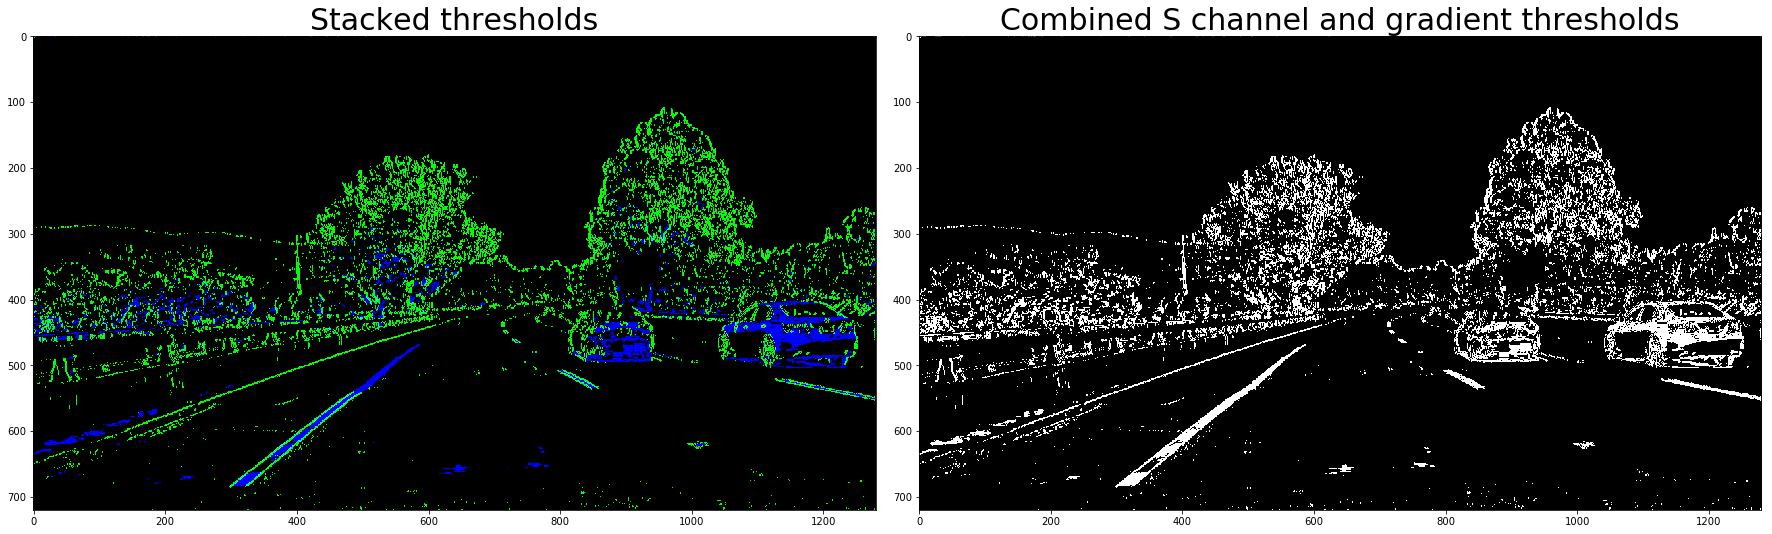

In [106]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread('C:\\data\\distortion\\test4.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hsv[:,:,2]
#    l_channel = hsv[:,:,1]

    # Grayscale image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

    return color_binary, combined_binary
    
color_binary, combined_binary = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(color_binary)
ax1.set_title('Stacked thresholds', fontsize=30)
ax2.imshow(combined_binary, cmap='gray')
ax2.set_title('Combined S channel and gradient thresholds', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

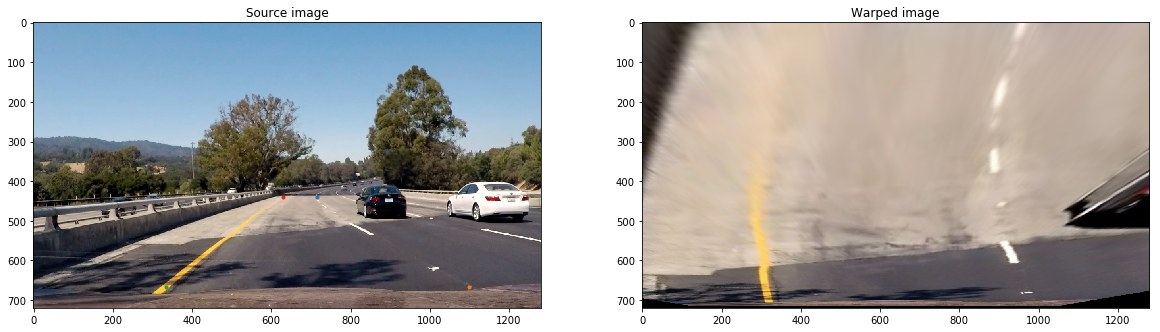

In [189]:
%matplotlib inline

image = mpimg.imread('C:\\data\\distortion\\test4.jpg')

def warp(img):
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32(
    [[716,440],
     [1100,666],
     [335,666],
     [630,440]])
    
    dst = np.float32(
    [[980,0],
     [980,700],
     [320,700],
     [320,0]])
    
    #Compute the perspective transform, M, given source and destination points
    M = cv2.getPerspectiveTransform(src,dst)
    #Warp an image using the perspective transform, M:
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped


warped_img = warp(image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Source image')
ax1.imshow(image)
ax1.plot(716,440,'.')
ax1.plot(1100,666,'.')
ax1.plot(335,666,'.')
ax1.plot(630,440,'.')
ax2.set_title('Warped image')
ax2.imshow(warped_img)

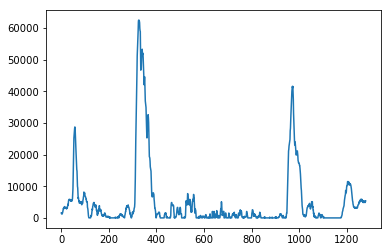

In [159]:
import numpy as np

image = mpimg.imread('C:\\data\\distortion\\transformed.jpg')

histogram = np.sum(image[image.shape[0]//2:,:], axis=0)
plt.plot(histogram)


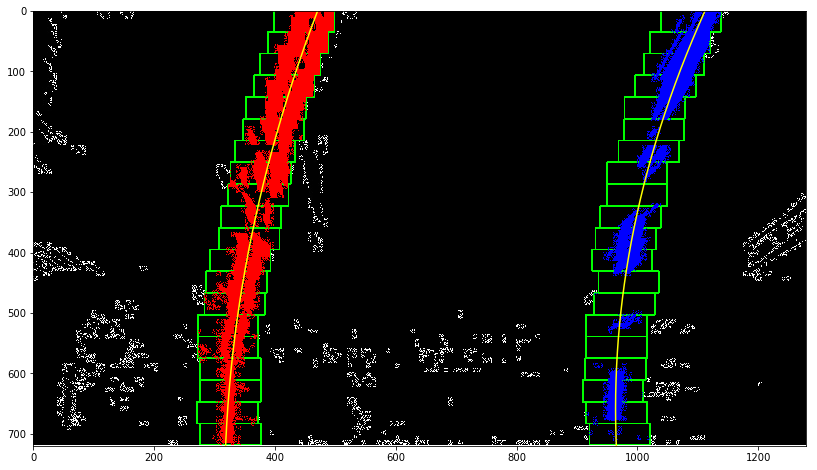

In [177]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# getting a warped binary image
def sliding_window11(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # number of sliding windows
    nwindows = 20
    # height of each window
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 50
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    #---------------------------------------------------------
    #check for any lanes that are not detected in this current frame then use the history
    left_lane.detected = False if (leftx.size < nwindows/2) else True
    right_lane.detected = False if (rightx.size < nwindows/2) else True

    # if lane is detected then try to fit the poly
    if left_lane.detected == True & right_lane.detected == True:
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        left_lane.best_fit = np.vstack([left_lane.best_fit,left_fit])
        left_lane.best_fit[0] = left_fit
        right_lane.best_fit = np.vstack([right_lane.best_fit,right_fit])
        right_lane.best_fit[0] = right_fit
        left_lane.best_fit = np.average(left_lane.best_fit[-left_lane.smoothen_nframes:], axis = 0)
        right_lane.best_fit = np.average(right_lane.best_fit[-right_lane.smoothen_nframes:], axis = 0)
        #print ("saved best fit")
    else: 
        #use the history avg values 
        left_fit = left_lane.best_fit
        right_fit = right_lane.best_fit
        #print ("used previous best fit")
        
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    #------------------------------------------------

    #Take the average of the last n frames   
    if left_lane.first_frame == True:
        left_lane.first_frame = False
        left_lane.bestx = np.vstack([left_lane.bestx,left_fitx])
        left_lane.bestx[0] = left_fitx
        #print ("Inside first frame")
    
    if ((left_fitx[0] > right_fitx[0]) | (abs(left_fitx[0] - right_fitx[0])<350) | (abs(left_fitx[0] - right_fitx[0])>700) | 
                   (left_fitx[0] > 800 )):
        left_lane.bestx = np.vstack([left_lane.bestx,left_lane.bestx])  
        #print ("Skip lane left")
    else:
        left_lane.bestx = np.vstack([left_lane.bestx,left_fitx])
        #print ("read lane left")
        
    left_lane.bestx = np.average(left_lane.bestx[-left_lane.smoothen_nframes:], axis = 0)
    
    if right_lane.first_frame == True:
        right_lane.first_frame = False
        right_lane.bestx = np.vstack([right_lane.bestx,right_fitx])
        right_lane.bestx[0] = right_fitx
        #print ("Inside first frame")
    
    if ((left_fitx[0] > right_fitx[0]) | (abs(left_fitx[0] - right_fitx[0])<350) | (abs(left_fitx[0] - right_fitx[0])>700) |
                      (right_fitx[0] > 1200)):
        right_lane.bestx = np.vstack([right_lane.bestx,right_lane.bestx])
        #print ("Skip lane right")
    else:
        right_lane.bestx = np.vstack([right_lane.bestx,right_fitx])
        #print ("read lane right")
    
    right_lane.bestx = np.average(right_lane.bestx[-right_lane.smoothen_nframes:], axis = 0)
    
    #------------------------------------------------
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    plt.figure(figsize=(15, 8))
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.imshow(out_img)
    return (out_img, left_lane, right_lane, (left_lane_inds, right_lane_inds))

(720, 0)

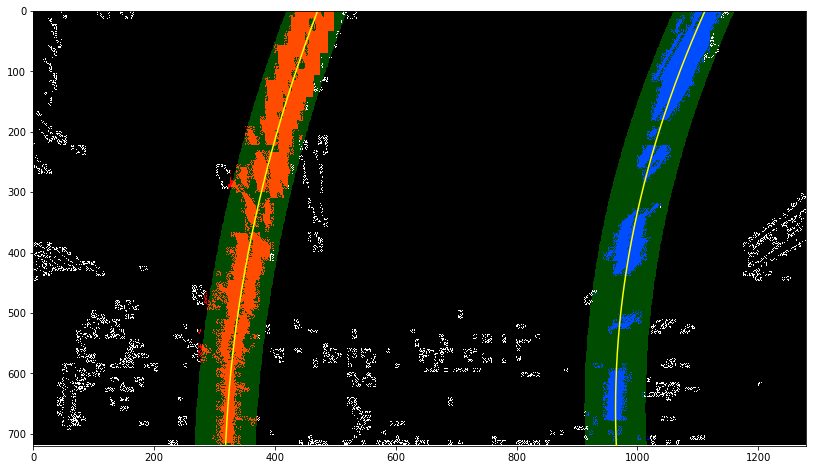

In [179]:
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.figure(figsize=(15, 8))
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [3]:
# Calculate directional gradient
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    if orient == 'y':
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return sobel_binary

# Calculate gradient magnitude
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return binary_output

# Calculate gradient direction
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the direction of the gradient using the absolute value of the x and y gradients
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    # 4) Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    return binary_output.astype(np.uint8)


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# getting a warped binary image
def sliding_window(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # number of sliding windows
    nwindows = 20
    # height of each window
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 50
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    #---------------------------------------------------------
    #check for any lanes that are not detected in this current frame then use the history
    left_lane.detected = False if (leftx.size < nwindows/2) else True
    right_lane.detected = False if (rightx.size < nwindows/2) else True

    # if lane is detected then try to fit the poly
    if left_lane.detected == True & right_lane.detected == True:
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
        left_lane.best_fit = np.vstack([left_lane.best_fit,left_fit])
        left_lane.best_fit[0] = left_fit
        right_lane.best_fit = np.vstack([right_lane.best_fit,right_fit])
        right_lane.best_fit[0] = right_fit
        left_lane.best_fit = np.average(left_lane.best_fit[-left_lane.smoothen_nframes:], axis = 0)
        right_lane.best_fit = np.average(right_lane.best_fit[-right_lane.smoothen_nframes:], axis = 0)
        #print ("saved best fit")
    else: 
        #use the history avg values 
        left_fit = left_lane.best_fit
        right_fit = right_lane.best_fit
        #print ("used previous best fit")
        
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    #------------------------------------------------

    #Take the average of the last n frames   
    if left_lane.first_frame == True:
        left_lane.first_frame = False
        left_lane.bestx = np.vstack([left_lane.bestx,left_fitx])
        left_lane.bestx[0] = left_fitx
        #print ("Inside first frame")
    
    if ((left_fitx[0] > right_fitx[0]) | (abs(left_fitx[0] - right_fitx[0])<350) | (abs(left_fitx[0] - right_fitx[0])>700) | 
                   (left_fitx[0] > 800 )):
        left_lane.bestx = np.vstack([left_lane.bestx,left_lane.bestx])  
        #print ("Skip lane left")
    else:
        left_lane.bestx = np.vstack([left_lane.bestx,left_fitx])
        #print ("read lane left")
        
    left_lane.bestx = np.average(left_lane.bestx[-left_lane.smoothen_nframes:], axis = 0)
    
    if right_lane.first_frame == True:
        right_lane.first_frame = False
        right_lane.bestx = np.vstack([right_lane.bestx,right_fitx])
        right_lane.bestx[0] = right_fitx
        #print ("Inside first frame")
    
    if ((left_fitx[0] > right_fitx[0]) | (abs(left_fitx[0] - right_fitx[0])<350) | (abs(left_fitx[0] - right_fitx[0])>700) |
                      (right_fitx[0] > 1200)):
        right_lane.bestx = np.vstack([right_lane.bestx,right_lane.bestx])
        #print ("Skip lane right")
    else:
        right_lane.bestx = np.vstack([right_lane.bestx,right_fitx])
        #print ("read lane right")
    
    right_lane.bestx = np.average(right_lane.bestx[-right_lane.smoothen_nframes:], axis = 0)
    
    #------------------------------------------------
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    plt.figure(figsize=(15, 8))
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.imshow(out_img)
    return (out_img, left_lane, right_lane, (left_lane_inds, right_lane_inds))

In [5]:
def generate_polygon(out_img, left_lane, right_lane, lane_inds):
    window_img = np.zeros_like(out_img)
    margin = 10
    
    left_lane_inds = lane_inds[0]
    right_lane_inds = lane_inds[1]
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = out_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 255]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [255, 0, 255]
    # Generate a polygon to illustrate the SMOOTHENED FIT
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_lane.bestx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_lane.bestx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_lane.bestx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_lane.bestx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 1, 0)
    
    # Generate a polygon to illustrate the CURRENT FRAME FIT
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,0, 255))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,0, 255))
    result = cv2.addWeighted(out_img, 1, window_img, 1, 0)
    
    #if the lane was detectded then calculate the curvatire or use the history
    if (leftx.size > 2 | rightx.size > 2) :
        y_eval = np.max(ploty)
        # Define conversions in x and y from pixels space to meters
        ym_per_pix = 30/720 # meters per pixel in y dimension
        xm_per_pix = 3.7/700 # meters per pixel in x dimension

        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters and dist from centre
        lane_centre = (left_fitx[-1] + right_fitx[-1])/2.0
        camera_centre = result.shape[1]/2.0

        dist_centre_val = (lane_centre - camera_centre)*3.7/700
        avg_cur = (right_curverad+left_curverad)/2.0
        
        left_lane.line_base_pos = np.vstack([left_lane.line_base_pos,dist_centre_val])
        left_lane.line_base_pos[0] = dist_centre_val
        left_lane.line_base_pos = np.average(left_lane.line_base_pos[-left_lane.smoothen_nframes:], axis = 0)
        
        left_lane.radius_of_curvature = np.vstack([left_lane.radius_of_curvature,avg_cur])
        left_lane.radius_of_curvature[0] = avg_cur
        left_lane.radius_of_curvature = np.average(left_lane.radius_of_curvature[-left_lane.smoothen_nframes:], axis = 0)
        
    #print (avg_cur, dist_centre_val)
    # else use the history curvature
    else:
        dist_centre_val = left_lane.line_base_pos
        avg_cur = left_lane.radius_of_curvature
    
    #reset the lane detected to false for the next frame 
    left_lane.detected == False
    right_lane.detected == False
    return result, left_lane.bestx, right_lane.bestx, ploty, left_lane.radius_of_curvature, left_lane.line_base_pos


Skip the sliding windows step once we know where the lines are.
In the next frame of video we don't need to do a blind search again, but instead we can just search in a margin around the previous line position.

The green shaded area in the example image below shows where we searched for the lines in the last time. So, once we know where the lines are in one frame of video, we can do a highly targeted search for them in the next frame. This is equivalent to using a customized region of interest for each frame of video, and should help us track the lanes through sharp curves and tricky conditions. In case we lose track of the lines, we can go back to the sliding windows search to rediscover them.

In [6]:
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient

# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
#print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')


520.322248916 m 593.019571528 m


In [62]:
%matplotlib inline

# perspective transform on undistorted images
def perspective_transform(image):
    shape_x = image.shape[0]
    shape_y = image.shape[1]
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    src = np.float32([[(.55*shape_y, 0.63*shape_x), (shape_y,shape_x),(0,shape_x),(.45*shape_y, 0.63*shape_x)]])
    dst = np.float32([[0.75*shape_y,0],[0.75*shape_y,shape_x], [0.25*shape_y,shape_x],[0.25*shape_y,0]])
    Minv = cv2.getPerspectiveTransform(src, dst)
    newwarp = cv2.warpPerspective(image, Minv, (image.shape[1], image.shape[0]), flags = cv2.INTER_LINEAR) 
    return newwarp, Minv

def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


In [8]:
global left_lane 
global right_lane

# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = np.zeros(720)
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = np.zeros(3)  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = np.zeros(1)
        #distance in meters of vehicle center from the line
        self.line_base_pos = np.zeros(1)
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        #smoothen the n frames 
        self.smoothen_nframes = 10
        #first frame 
        self.first_frame = True
        
left_lane = Line()
right_lane = Line()

In [9]:

def camera_calibration():
    dist_pickle = pickle.load( open( "camera_calibration.p", "rb" ) )
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    return mtx, dist

    
def do_calibration():
    #for camera calibration and store the result in a file "camera_cal/camera_cal.p" 
    #Array to store the obj point and image points
    objpoints = []
    imgpoints = []
    objp = np.zeros((6*9,3),np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
    #images = glob.glob('C:\data\\calibration_wide\GO*.jpg')
    images = glob.glob('C:\\Users\\swillin\\Downloads\\Advanced-Lane-Detection-master\\camera_cal\\cal*')
    for fnames in images:
        img = mpimg.imread(fnames)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            #draw lines on the cheesboard
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            #plt.imshow(img)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    #save the calibration data in a pickle file to use later
    camera_cal_val = "camera_calibration.p" 
    output = open(camera_cal_val, 'wb')

    mydict2 = {'mtx': 1, 'dist': 2}
    mydict2['mtx'] = mtx
    mydict2['dist'] = dist
    pickle.dump(mydict2, output)
    output.close()    
do_calibration()

In [82]:
%matplotlib inline

def thresholding(image):
    
    sobel_x_thresh=(211,255)
    sobel_y_thresh=(0,25)
    magnitude_thresh=(150,255)
    dir_thresh=(0.7,1.3)
    s_thres=(113,255)
    v_thres=(235,255)
    sobel_kernel = 15
    adp_thresh = 250
    y_size = image.shape[0]
    x_size = image.shape[1]
    mask_trapeze = np.array([[(.6*x_size, 0.55*y_size), (x_size,y_size), (0,y_size),(.45*x_size, 0.55*y_size)]], dtype=np.int32)
    
    # Convert to HLS color space and set saturation channel
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hls[:,:,2].astype(np.uint8)
    
    # Convert to HSV color space and set value channel
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV).astype(np.float)
    v_channel = hls[:,:,2].astype(np.uint8)
    
    #threshold grad
    gradx = abs_sobel_thresh(v_channel, orient='x', sobel_kernel=sobel_kernel, thresh=sobel_x_thresh)
    grady = abs_sobel_thresh(v_channel, orient='y', sobel_kernel=sobel_kernel, thresh=sobel_y_thresh)
    mag_binary = mag_thresh(v_channel, sobel_kernel=sobel_kernel, mag_thresh=magnitude_thresh)
    dir_binary = dir_threshold(v_channel, sobel_kernel=sobel_kernel, thresh=dir_thresh)
    combined_grad = np.zeros_like(gradx)
    combined_grad[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    # Threshold color channel for yellow lanes
    s_binary = np.zeros_like(s_channel).astype(np.uint8)
    s_binary[(s_channel > s_thres[0]) & (s_channel <= s_thres[1])] = 1
    v_binary = np.zeros_like(v_channel).astype(np.uint8)
    v_binary[(v_channel > v_thres[0]) & (v_channel <= v_thres[1])] = 1
    combined_yellow = ((s_binary == 1) | (v_binary == 1))
    
    # Threshold color channel for white lanes
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype(np.uint8)
    img_hist = cv2.equalizeHist(gray)
    ret, thrs = cv2.threshold(img_hist, thresh=adp_thresh, maxval=255, type=cv2.THRESH_BINARY)
    adp = thrs/255
    
    color_binary = np.zeros_like(gradx)
    color_binary[(combined_grad == 1) | (combined_yellow == 1) | (adp == 1)] = 1
    color_binary = np.dstack(( color_binary, color_binary, color_binary)).astype(np.float32)
    
    #region of interest is applied here 
    color_binary = region_of_interest(color_binary.astype(np.uint8), mask_trapeze)
    
    plt.imshow(color_binary*255, cmap = "gray")
    return color_binary.astype(np.float32), combined_grad, combined_yellow

In [33]:
%matplotlib inline

def draw_on_original(warped, left_fitx, right_fitx, ploty, Minv):
    # Create an image to draw the lines on
    #warp_zero = np.zeros_like(warped).astype(np.uint8)
    #color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    color_warp = np.zeros_like(warped).astype(np.uint8)

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane with low confidence region (red)
    cv2.fillPoly(color_warp, np.int_([pts]), (255, 0, 0))
    
    #confidence region in green
#    diff = (right_fitx - left_fitx)/2
#    pts_left = np.array([np.transpose(np.vstack([left_fitx[400:], ploty[400:]]))])
#    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx[400:], ploty[400:]])))])
#    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
#    cv2.fillPoly(color_warp, np.int_([pts]), (0, 255, 0))
    
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(warped, 1, newwarp, 0.35, 0)
    plt.imshow(result)

    return result

In [90]:
%matplotlib inline

def pipeline(img):
    plt.imshow(img)
    #to select whether diagnostic video(1) or submission video(0)
    verbose = 1
    #undistor the image
    mtx, dist = camera_calibration()
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(undist)
    #apply the thresholding operation
    thresh_combined, grad_th, col_th = thresholding(undist)
    #Perspective transformation
    perspective, Minv = perspective_transform(thresh_combined)
    perspective = cv2.cvtColor(perspective, cv2.COLOR_RGB2GRAY).astype(np.uint8)
    #plt.imshow(perspective, cmap='gray')
    
    #pass the perspective image to the lane fitting stage
    out_img, left_lane, right_lane, lane_inds = sliding_window(perspective)
    plt.imshow(out_img)
    
    slides_pers, left_fitx, right_fitx, ploty, avg_cur, dist_centre_val = generate_polygon(out_img, left_lane, right_lane, lane_inds)
    #draw the detected lanes on the original image 
    mapped_lane = draw_on_original(undist, left_fitx, right_fitx, ploty, Minv)
    #font and text for drawing the offset and curvature 
    curvature = "Estimated lane curvature %.2fm" % (avg_cur)
    dist_centre = "Estimated offset from lane center %.2fm" % (dist_centre_val)
    font = cv2.FONT_HERSHEY_COMPLEX
    # using cv2 for drawing text/images in diagnostic pipeline.
    if verbose == 0:
        middlepanel = np.zeros((120, 900, 3), dtype=np.uint8)
        l1 = np.zeros((50, 50, 3), dtype=np.uint8)
        l2 = np.zeros((50, 50, 3), dtype=np.uint8)
        l3 = np.zeros((50, 50, 3), dtype=np.uint8)
        l4 = np.zeros((50, 50, 3), dtype=np.uint8)
        l5 = np.zeros((50, 50, 3), dtype=np.uint8)
        l6 = np.zeros((50, 50, 3), dtype=np.uint8)
        l7 = np.zeros((50, 50, 3), dtype=np.uint8)
        legend = np.zeros((240, 1200, 3), dtype=np.uint8)

        cv2.putText(middlepanel, curvature, (30, 60), font, 1, (255,255,255), 2)
        cv2.putText(middlepanel, dist_centre, (30, 90), font, 1, (255,255,255), 2)
        cv2.putText(l1,"1", (15, 35), font, 1, (255,255,0), 2)
        cv2.putText(l2,"2", (15, 30), font, 1, (255,255,0), 2)
        cv2.putText(l3,"3", (15, 30), font, 1, (255,255,0), 2)
        cv2.putText(l4,"4", (15, 30), font, 1, (255,255,0), 2)
        cv2.putText(l5,"5", (15, 30), font, 1, (255,255,0), 2)
        cv2.putText(l6,"6", (15, 30), font, 1, (255,255,0), 2)
        cv2.putText(l7,"7", (15, 30), font, 1, (255,255,0), 2)
        text = "1-Detected Lanes, 2-Color Threshold\n3-Gradient Threshold, 4-Thresholding operations combined\n5-Perspective Transformation, 6-Original Frame\n7-Mapping Polynomials, Blue line-current frame polynomial fit,\nGreen line-smoothened polynomial fit, Pink - Lane pixels"

        y0, dy = 50, 40
        for i, line in enumerate(text.split('\n')):
            y = y0 + i*dy
            cv2.putText(legend, line, (50, y ), font, 1, (255,255,255),2)

        diagScreen = np.zeros((1080, 1920, 3), dtype=np.uint8)
        #2
        diagScreen[0:360, 1200:1560] = cv2.resize(np.dstack((col_th*255,col_th*255, col_th*255)), (360,360), interpolation=cv2.INTER_AREA) 
        #3
        diagScreen[0:360, 1560:1920] = cv2.resize(np.dstack((grad_th*255,grad_th*255,grad_th*255)), (360,360), interpolation=cv2.INTER_AREA) 
        #4
        diagScreen[360:720, 1200:1560] = cv2.resize(thresh_combined*255, (360,360), interpolation=cv2.INTER_AREA) 
        #5
        diagScreen[360:720,1560:1920] = cv2.resize(np.dstack((perspective*255, perspective*255, perspective*255)), (360,360), interpolation=cv2.INTER_AREA) 
        #7
        diagScreen[720:1080,1560:1920] = cv2.resize(slides_pers, (360,360), interpolation=cv2.INTER_AREA) 
        #6
        diagScreen[720:1080,1200:1560] = cv2.resize(img, (360,360), interpolation=cv2.INTER_AREA) 
        #1
        diagScreen[0:720, 0:1200] = cv2.resize(mapped_lane, (1200,720), interpolation=cv2.INTER_AREA) 

        #radii, offset and legend here
        diagScreen[720:840, 0:900] = middlepanel
        diagScreen[0:50, 0:50] = l1
        diagScreen[0:50, 1200: 1250] = l2
        diagScreen[0:50, 1560:1610] = l3
        diagScreen[720:770, 1560:1610] = l7
        diagScreen[360:410, 1560:1610] = l5
        diagScreen[720:770, 1200:1250] = l6
        diagScreen[360:410, 1200:1250] = l4
        diagScreen[840:1080, 0:1200] = legend
        #if diagnosis then return this image 
        return diagScreen
    #else return the original mapped imaged with the curvature and offset drawn
    cv2.putText(mapped_lane, curvature, (30, 60), font, 1.2, (255,0,0), 2)
    cv2.putText(mapped_lane, dist_centre, (30, 120), font, 1.2, (255,0,0), 2)
    return mapped_lane

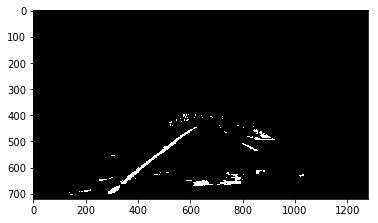

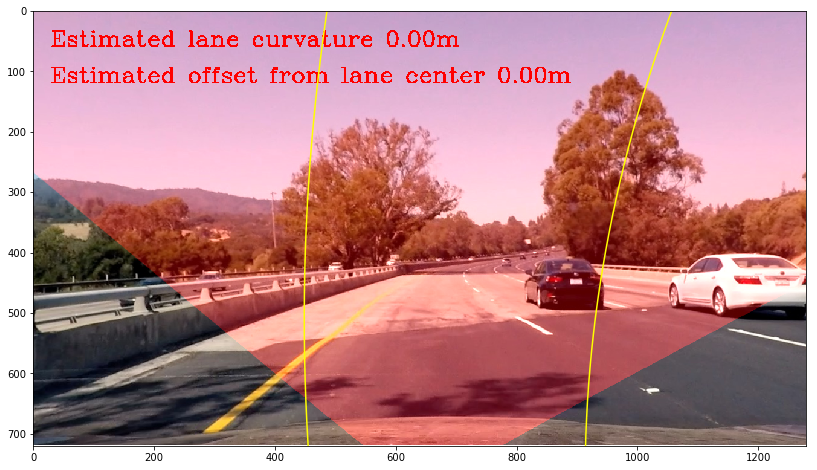

In [91]:
%matplotlib inline
image = mpimg.imread('C:\\data\\distortion\\test4.jpg')
mapped_lane = pipeline(image)
plt.imshow(mapped_lane)

In [13]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

white_output = 'C:\\Users\\swillin\\Documents\\Private\\courses\\Driver\\projects\\advanced_lane_finding\\test_videos_output\\project_video.mp4'
clip1 = VideoFileClip("C:\\Users\\swillin\\Documents\\Private\\courses\\Driver\\projects\\advanced_lane_finding\\test_videos\\project_video.mp4")
white_clip = clip1.fl_image(pipeline).subclip(1,3) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video C:\Users\swillin\Documents\Private\courses\Driver\projects\advanced_lane_finding\test_images_output\project_video.mp4
[MoviePy] Writing video C:\Users\swillin\Documents\Private\courses\Driver\projects\advanced_lane_finding\test_images_output\project_video.mp4


 99%|█████████▉| 100/101 [01:08<00:00,  1.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: C:\Users\swillin\Documents\Private\courses\Driver\projects\advanced_lane_finding\test_images_output\project_video.mp4 

Wall time: 1min 11s
